In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('yield_df.csv')

In [ ]:
df.head()

Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37

<Axes: xlabel='Year', ylabel='hg/ha_yield'>

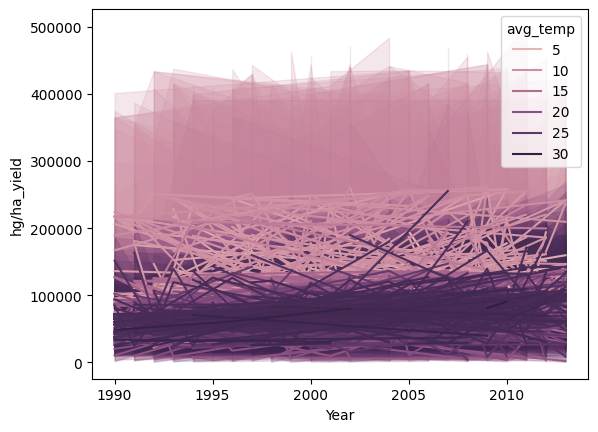

In [ ]:
# @title Average yield per hectare vs Average temperature over time

sns.lineplot(data=df, x='Year', y='hg/ha_yield', hue='avg_temp')

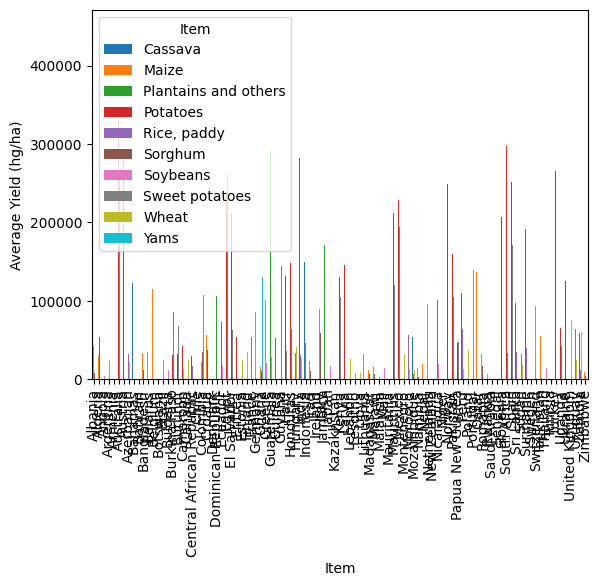

In [ ]:
# @title Yield Distribution by Item and Area

import matplotlib.pyplot as plt
df_grouped = df.groupby(['Area', 'Item'])['hg/ha_yield'].mean().unstack()
df_grouped.plot(kind='bar')
plt.xlabel('Item')
_ = plt.ylabel('Average Yield (hg/ha)')

<Axes: xlabel='Item', ylabel='hg/ha_yield'>

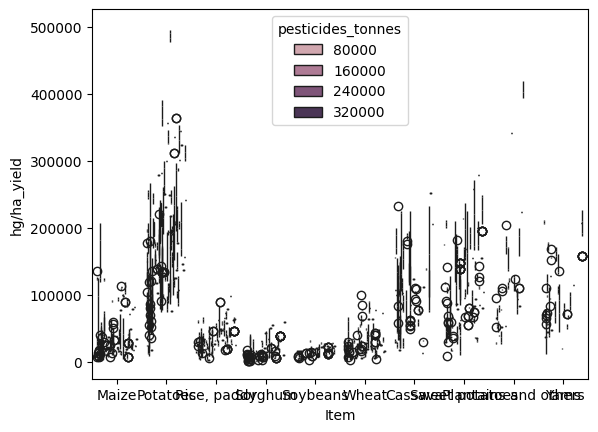

In [ ]:
# @title Average yield vs Pesticides used by item

sns.boxplot(data=df, x="Item", y="hg/ha_yield", hue="pesticides_tonnes")

<Axes: xlabel='average_rain_fall_mm_per_year', ylabel='hg/ha_yield'>

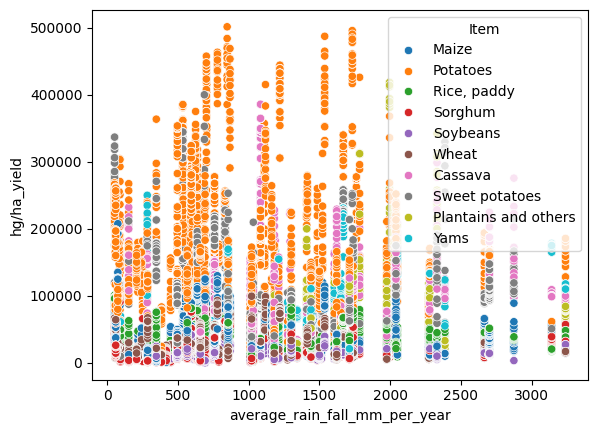

In [ ]:
# @title Average yield vs average rainfall

sns.scatterplot(data=df, x='average_rain_fall_mm_per_year', y='hg/ha_yield', hue='Item')

<Axes: xlabel='Year'>

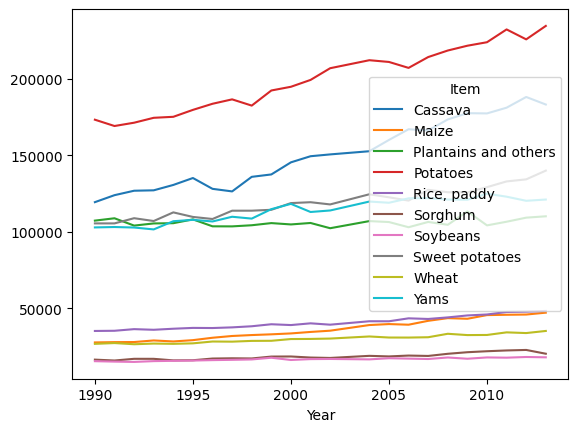

In [ ]:
# @title Average yield per item over time

df.groupby(['Year','Item'])['hg/ha_yield'].mean().unstack().plot(kind='line')

<Axes: xlabel='avg_temp', ylabel='hg/ha_yield'>

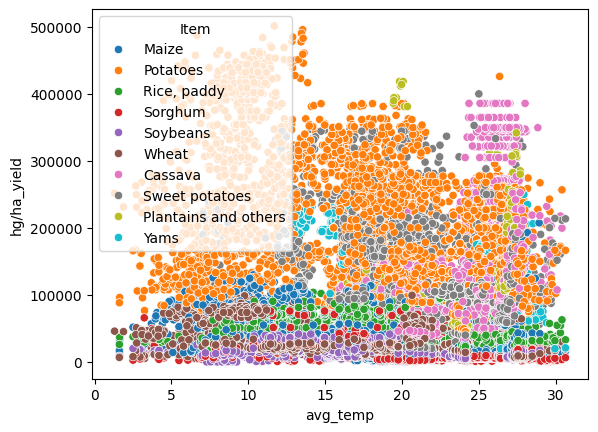

In [ ]:
# @title Average yield per hectare vs Average temperature

sns.scatterplot(data=df, x="avg_temp", y="hg/ha_yield", hue="Item")

In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [ ]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
df.duplicated().sum()

2310

In [ ]:

df.drop_duplicates(inplace=True)

In [ ]:
print(df.columns)

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [ ]:
df.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


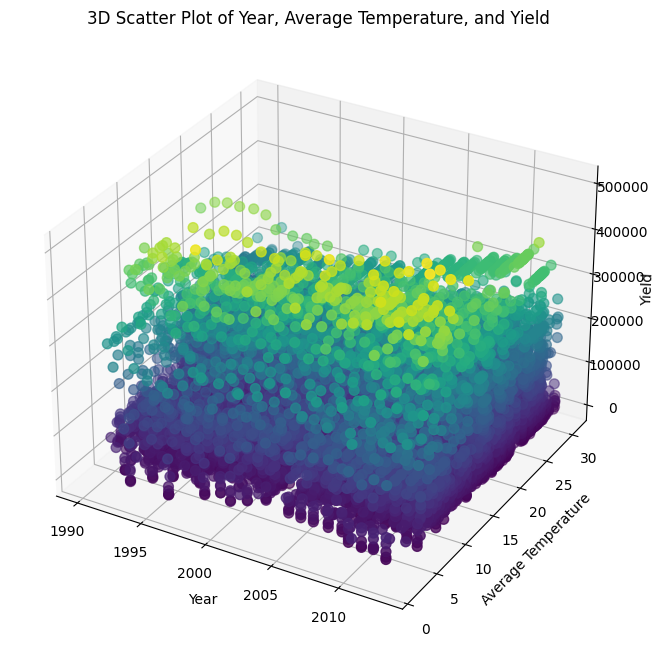

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Year']
y = df['avg_temp']
z = df['hg/ha_yield']

ax.scatter(x, y, z, c=z, cmap='viridis', s=50)
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature')
ax.set_zlabel('Yield')
ax.set_title('3D Scatter Plot of Year, Average Temperature, and Yield')
plt.show()


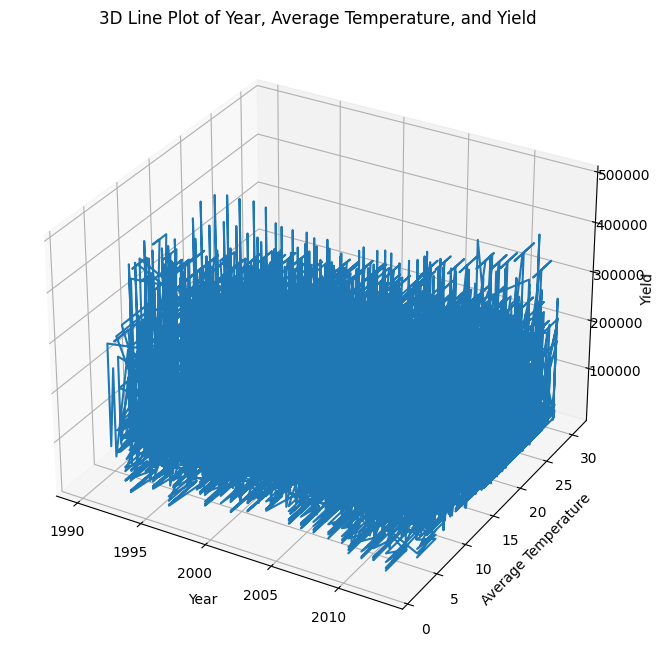

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Year']
y = df['avg_temp']
z = df['hg/ha_yield']

ax.plot(x, y, z)
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature')
ax.set_zlabel('Yield')
ax.set_title('3D Line Plot of Year, Average Temperature, and Yield')
plt.show()


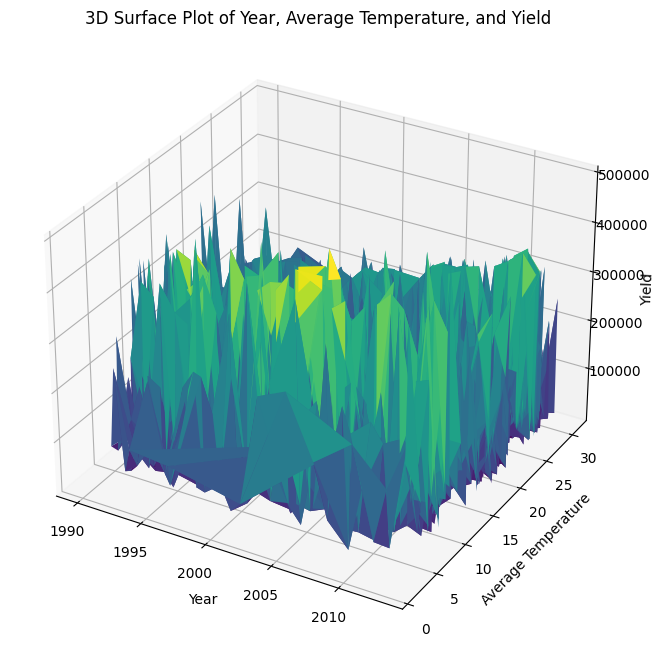

In [ ]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = df['Year']
y = df['avg_temp']
z = df['hg/ha_yield']

ax.plot_trisurf(x, y, z, cmap='viridis', edgecolor='none')
ax.set_xlabel('Year')
ax.set_ylabel('Average Temperature')
ax.set_zlabel('Yield')
ax.set_title('3D Surface Plot of Year, Average Temperature, and Yield')
plt.show()


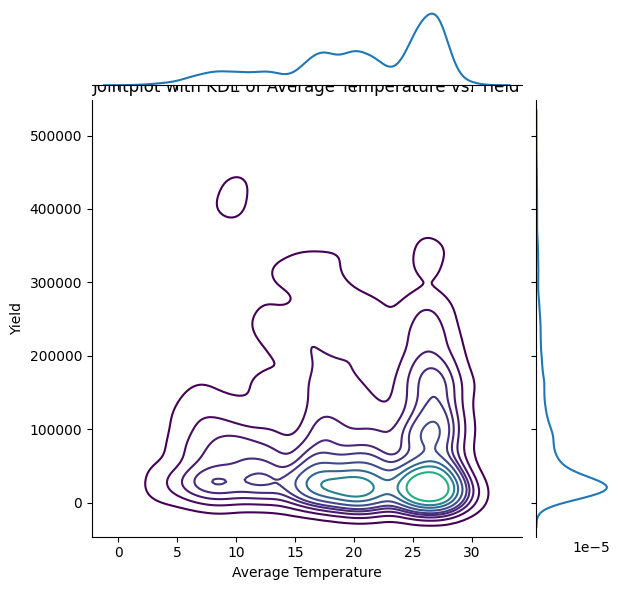

In [ ]:
sns.jointplot(x='avg_temp', y='hg/ha_yield', data=df, kind='kde', cmap='viridis')
plt.xlabel('Average Temperature')
plt.ylabel('Yield')
plt.title('Jointplot with KDE of Average Temperature vs. Yield')
plt.show()


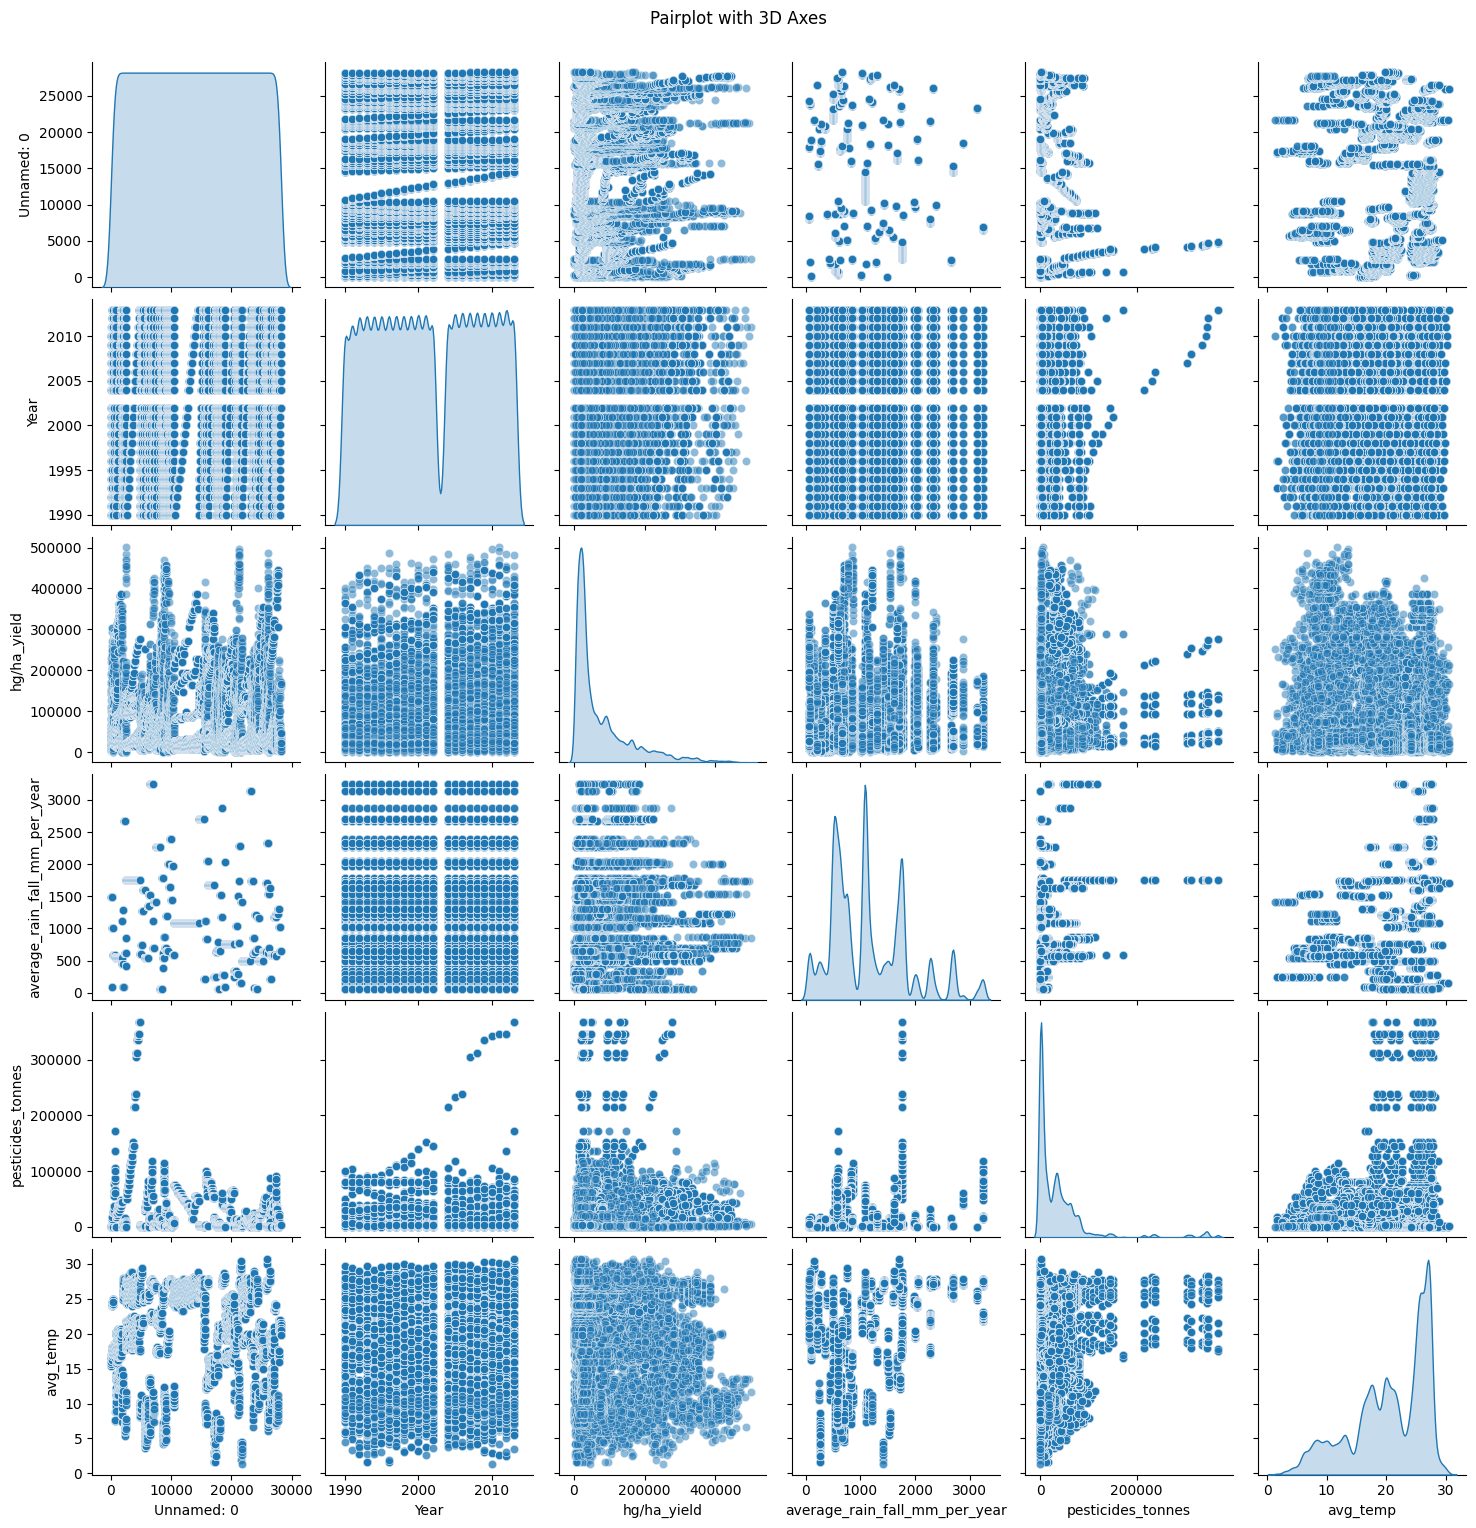

In [ ]:
g = sns.pairplot(df, kind='scatter', diag_kind='kde', diag_kws={'bw_adjust': 0.5}, plot_kws={'alpha': 0.5})
g.fig.suptitle('Pairplot with 3D Axes', y=1.02)
plt.show()


In [ ]:
# prompt: tell me waht the above pair plot is telling

The pairplot shows the relationships between all pairs of variables in the `df` DataFrame. Each diagonal plot is a kernel density estimation (KDE) plot of the individual variable, while the off-diagonal plots are scatter plots of the two variables.

Here are some observations from the pairplot:

* There is a positive correlation between `avg_temp` and `hg/ha_yield`, meaning that as average temperature increases, the average yield per hectare also tends to increase.
* There is a weak negative correlation between `pesticides_tonnes` and `hg/ha_yield`, meaning that as the amount of pesticides used increases, the average yield per hectare tends to decrease.
* There is a weak positive correlation between `average_rain_fall_mm_per_year` and `hg/ha_yield`, meaning that as the average rainfall increases, the average yield per hectare tends to increase.
* The `Item` variable seems to have a strong influence on the relationship between `avg_temp` and `hg/ha_yield`, as the scatter plot for this pair of variables shows different trends for different items.
* The `Area` variable also seems to have some influence on the relationship between `avg_temp` and `hg/ha_yield`, as the scatter plot for this pair of variables shows different trends for different areas.

Overall, the pairplot provides a useful visual summary of the relationships between all pairs of variables in the `df` DataFrame. This information can be used to explore further questions about the data, such as how different variables are related to each other and how they might affect the average yield per hectare.

In [ ]:
import plotly.graph_objs as go

# Create a trace for the 3D scatter plot
trace = go.Scatter3d(
    x=df['Year'],
    y=df['avg_temp'],
    z=df['hg/ha_yield'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['hg/ha_yield'],  # Color by yield
        colorscale='Viridis',     # Color scale
        opacity=0.8
    ),
    text=df['Area'] + ', ' + df['Item']  # Text to display on hover
)

# Create layout for the plot
layout = go.Layout(
    title='Interactive 3D Scatter Plot',
    scene=dict(
        xaxis=dict(title='Year'),
        yaxis=dict(title='Average Temperature'),
        zaxis=dict(title='Yield')
    ),
    hovermode='closest'  # Show information on hover closest point
)

# Create figure
fig = go.Figure(data=[trace], layout=layout)

# Display the plot
fig.show()


# Transforming average_rain_fall_mm_per_year
In summary, this code identifies the indices of rows in the DataFrame df where the values in the column 'average_rain_fall_mm_per_year' are not numeric strings. These rows can be considered for removal or further processing, depending on the specific use case.

In [ ]:
# Convert the column to numeric, coercing invalid parsing to NaN
df['average_rain_fall_mm_per_year_numeric'] = pd.to_numeric(df['average_rain_fall_mm_per_year'], errors='coerce')

# Identify the indices of rows where NaN values occur
to_drop = df[df['average_rain_fall_mm_per_year_numeric'].isna()].index

# Drop the additional column created for numeric conversion if needed
# df.drop(columns=['average_rain_fall_mm_per_year_numeric'], inplace=True)


In [ ]:
df = df.drop(to_drop)

In [ ]:
df

Area            Item  Year  hg/ha_yield  \
0       Albania           Maize  1990        36613   
1       Albania        Potatoes  1990        66667   
2       Albania     Rice, paddy  1990        23333   
3       Albania         Sorghum  1990        12500   
4       Albania        Soybeans  1990         7000   
...         ...             ...   ...          ...   
28237  Zimbabwe     Rice, paddy  2013        22581   
28238  Zimbabwe         Sorghum  2013         3066   
28239  Zimbabwe        Soybeans  2013        13142   
28240  Zimbabwe  Sweet potatoes  2013        22222   
28241  Zimbabwe           Wheat  2013        22888   

       average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0                             1485.0             121.00     16.37   
1                             1485.0             121.00     16.37   
2                             1485.0             121.00     16.37   
3                             1485.0             121.00     16.37   
4                             1485.0             121.00     16.37   
...                              ...                ...       ...   
28237                          657.0            2550.07     19.76   
28238                          657.0            2550.07     19.76   
28239                          657.0            2550.07     19.76   
28240                          657.0            2550.07     19.76   
28241                          657.0            2550.07     19.76   

       average_rain_fall_mm_per_year_numeric  
0                                     1485.0  
1                                     1485.0  
2                                     1485.0  
3                                     1485.0  
4                                     1485.0  
...                                      ...  
28237                                  657.0  
28238                                  657.0  
28239                                  657.0  
28240                                  657.0  
28241                                  657.0  

[25932 rows x 8 columns]

In [ ]:
df['average_rain_fall_mm_per_year'] = df['average_rain_fall_mm_per_year'].astype(np.float64)

# Graph Frequency vs Area

In [ ]:
len(df['Area'].unique())

101

<ipython-input-26-557bcd692f9e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


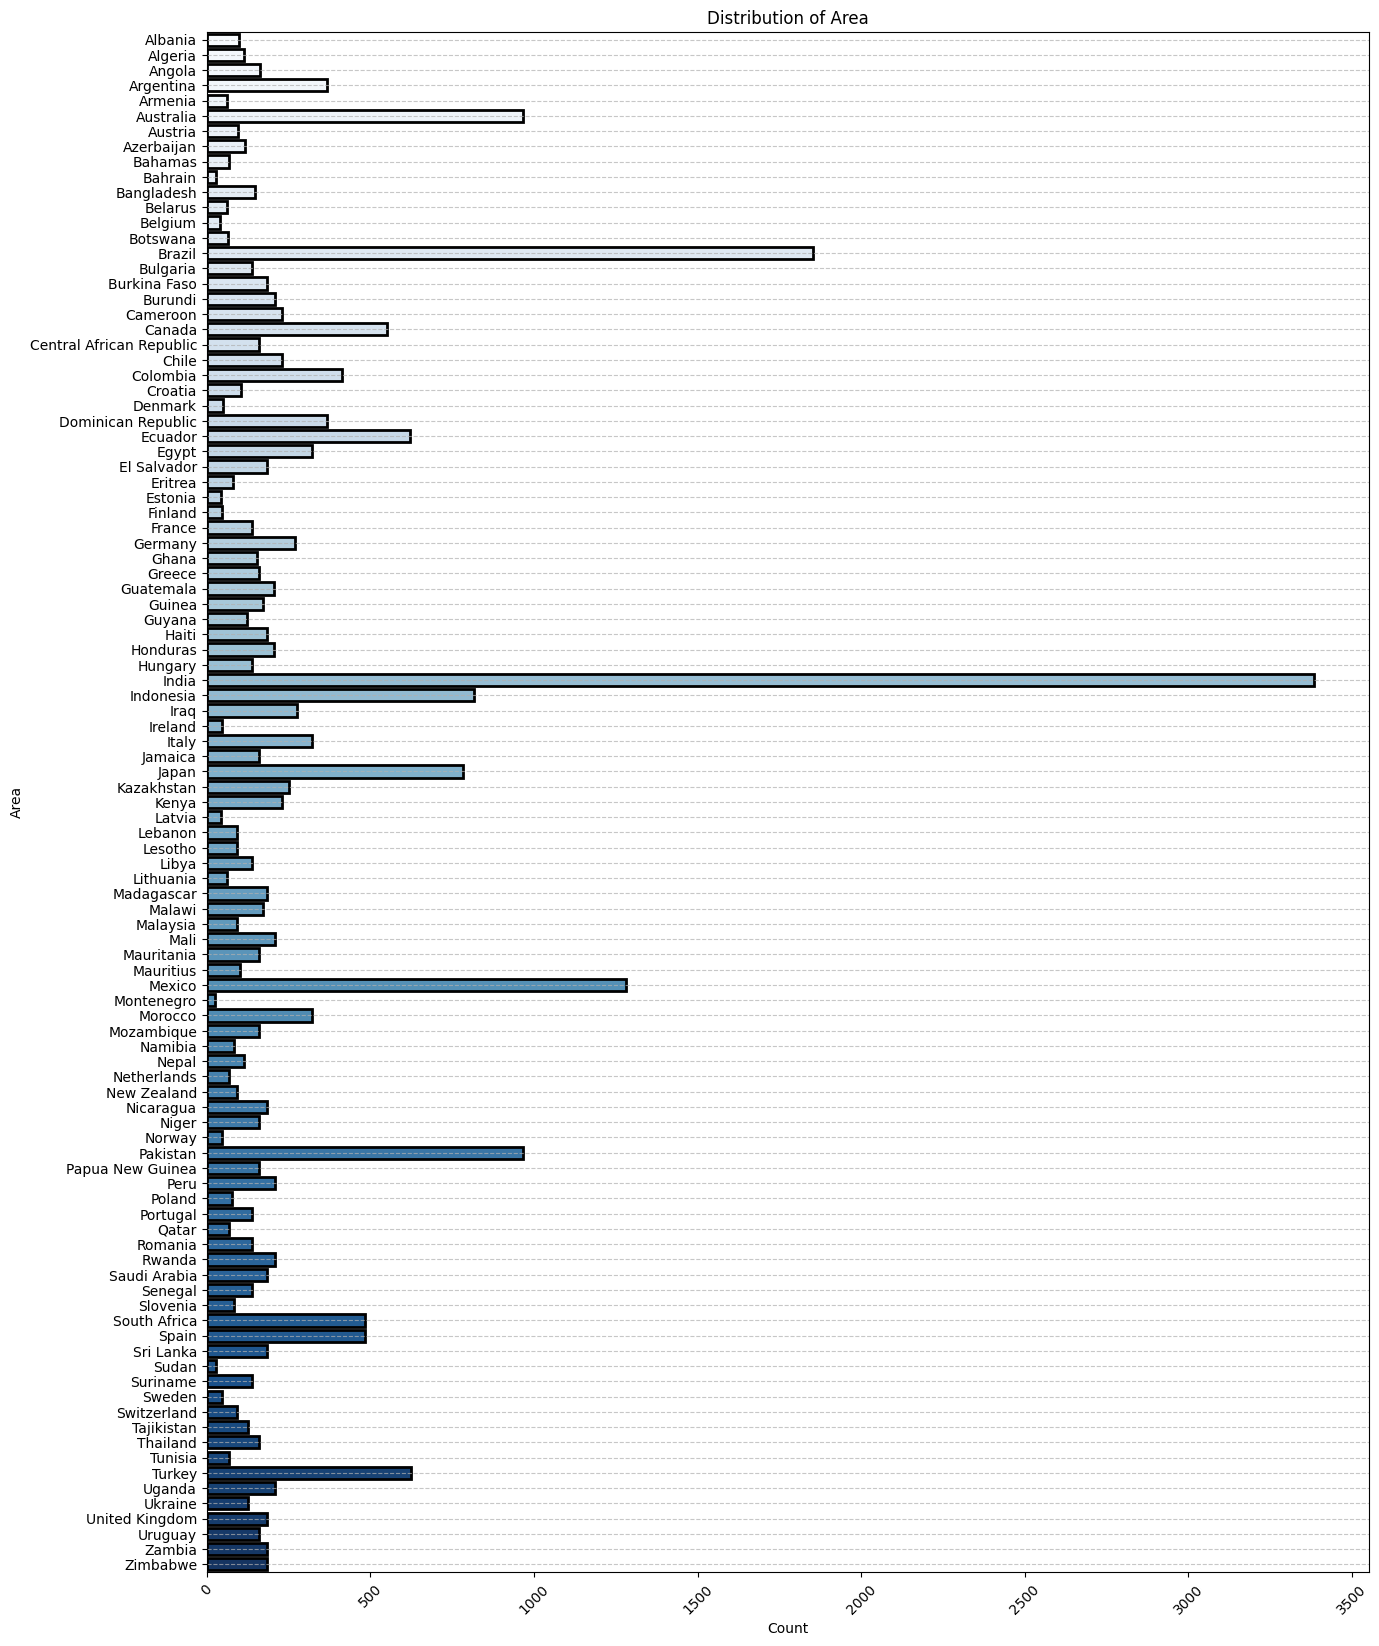

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Customize the figure size and layout
plt.figure(figsize=(15, 20))  # Adjust width and height as needed

# Create the countplot with additional styling and customization
sns.countplot(
    y=df['Area'],
    palette="Blues",  # Choose a color palette from seaborn
    linewidth=2,  # Increase line width for better visibility
    edgecolor="black",  # Add black borders to bars
)

# Add a title and informative axis labels
plt.title("Distribution of Area")
plt.xlabel("Count")
plt.ylabel("Area")

# Rotate x-axis labels for better readability if many categories
plt.xticks(rotation=45)

# Customize grid appearance (optional)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Display the plot
plt.show()


In [ ]:
(df['Area'].value_counts() < 500).sum()

91

# yield_per_country

In [ ]:
country = df['Area'].unique()
yield_per_country = [df[df['Area'] == state]['hg/ha_yield'].sum() for state in country]


In [ ]:
df['hg/ha_yield'].sum()

1996196943

In [ ]:
yield_per_country

[5711536,
 6711464,
 5722563,
 32864032,
 4524100,
 109111062,
 10852258,
 4608380,
 4384717,
 4443889,
 7720159,
 4704812,
 8442270,
 470651,
 136340329,
 6263075,
 6083337,
 7031146,
 10717883,
 34706922,
 4255627,
 20561214,
 26927138,
 6083167,
 10701651,
 25312166,
 21315591,
 36828848,
 16855944,
 1452416,
 3595638,
 6210668,
 15790618,
 38780463,
 9260371,
 14571925,
 16508723,
 7975743,
 8361103,
 8619194,
 10920131,
 8824110,
 274219558,
 68067328,
 10984722,
 9104030,
 32280700,
 19698007,
 100924145,
 9965212,
 14391737,
 3698588,
 6956804,
 4258932,
 9016288,
 4174348,
 6103523,
 8346715,
 7934982,
 15106720,
 4465841,
 12684212,
 113698872,
 1645100,
 22173010,
 6964027,
 3165475,
 4113713,
 14086433,
 17657728,
 12819227,
 12316327,
 6721305,
 49264956,
 10729929,
 15201910,
 6564711,
 12154347,
 5995626,
 6006156,
 7741053,
 15171886,
 10342677,
 7197013,
 30999849,
 46773540,
 11217741,
 1896346,
 14786468,
 8620653,
 13336346,
 6295210,
 9511720,
 3724246,
 52263950,
 

# Yield Per Country Graph

<ipython-input-43-23244f56f5ab>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




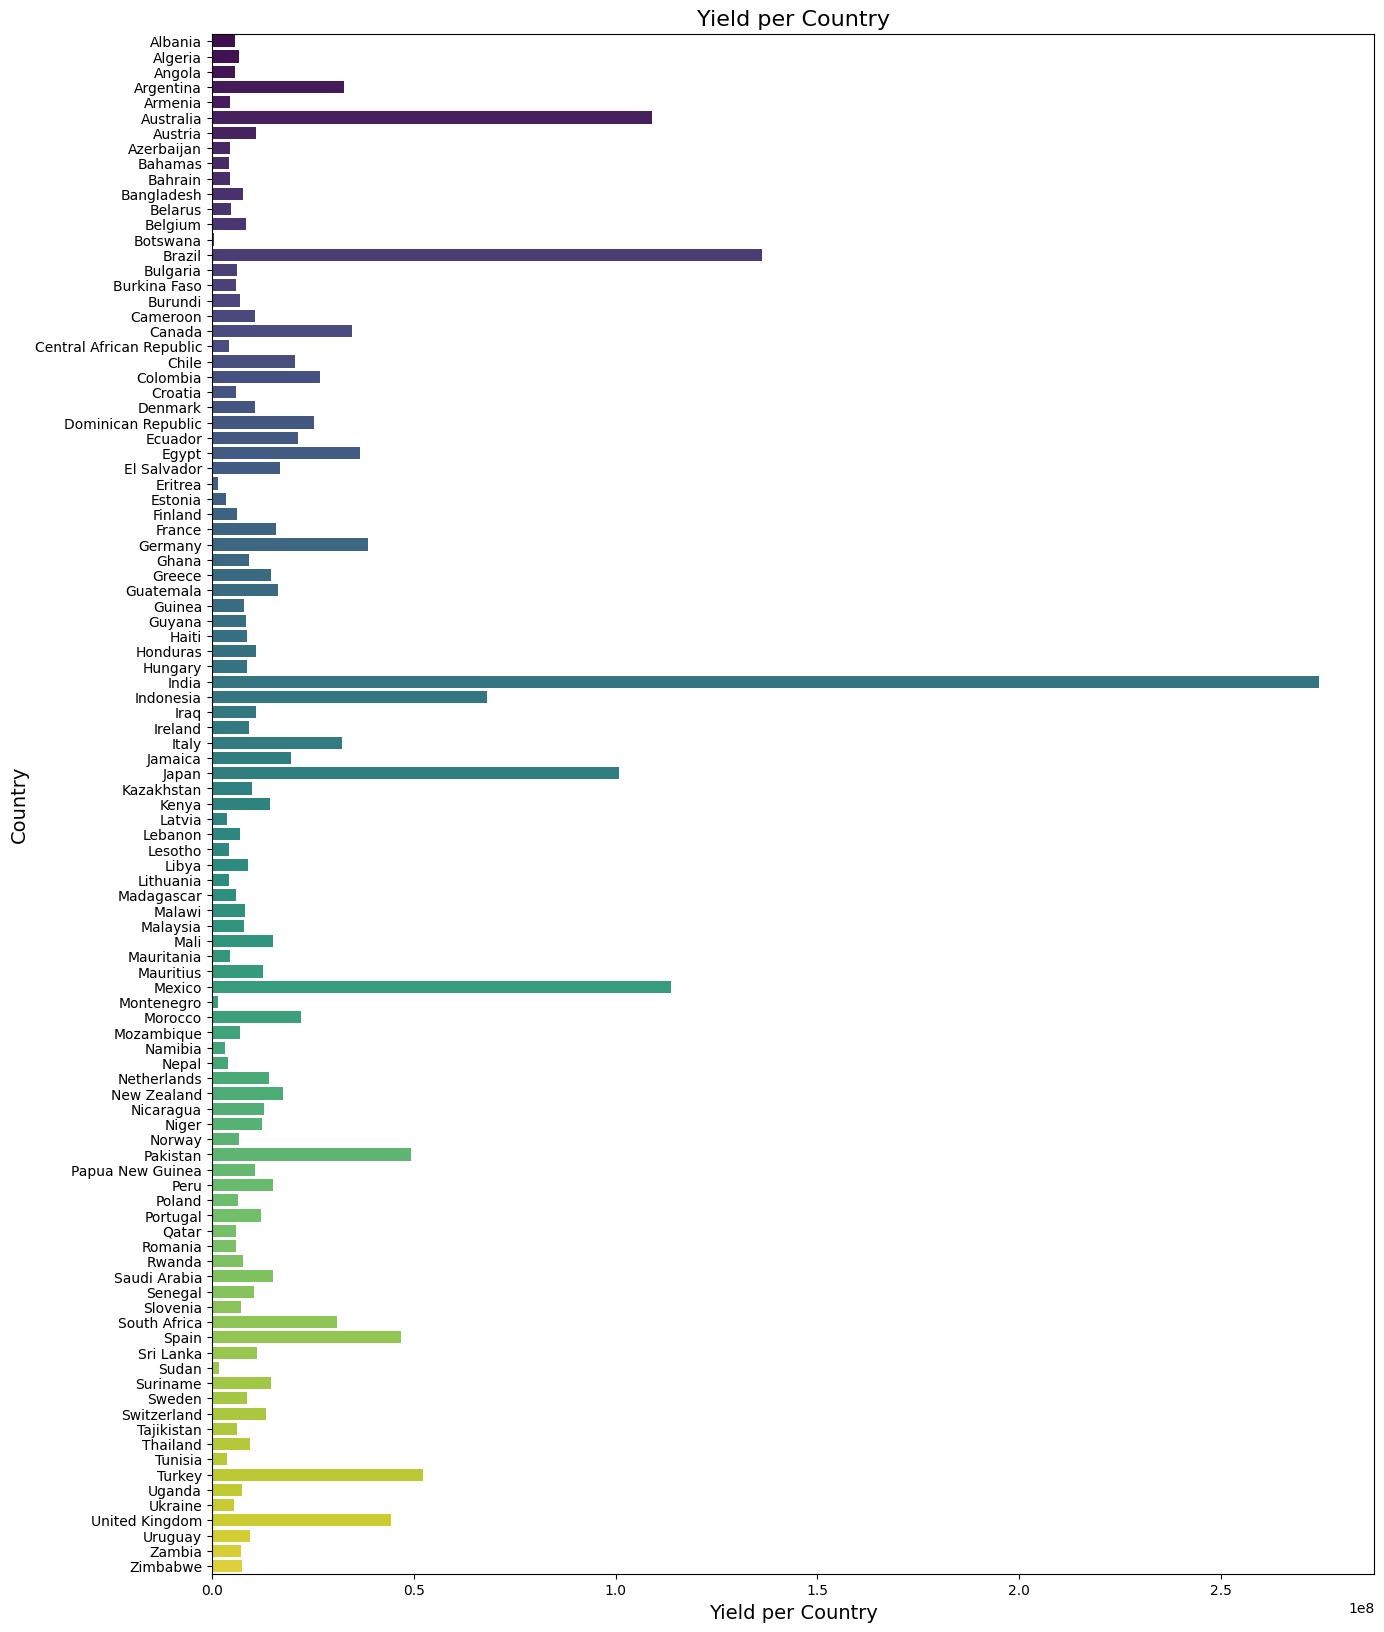

In [ ]:


# Set the figure size
plt.figure(figsize=(15, 20))

# Create the bar plot
sns.barplot(y=country, x=yield_per_country, palette="viridis")

# Add labels and title
plt.xlabel('Yield per Country', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.title('Yield per Country', fontsize=16)

# Show the plot
plt.show()


# Graph Frequency vs Item

<ipython-input-44-ca130fad110c>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




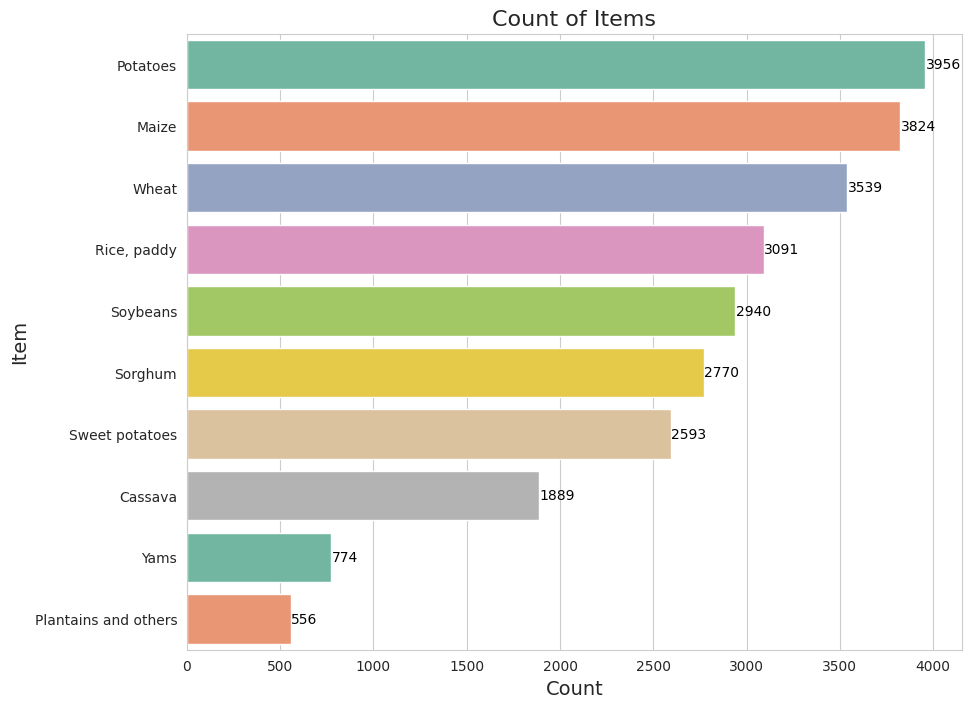

In [ ]:


# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and axis objects with specified size
plt.figure(figsize=(10, 8))

# Plot the countplot with seaborn
sns.countplot(y=df['Item'], palette="Set2", order=df['Item'].value_counts().index)

# Add title and labels
plt.title("Count of Items", fontsize=16)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Item", fontsize=14)

# Add annotations with counts on the bars
for i, v in enumerate(df['Item'].value_counts()):
    plt.text(v + 3, i, str(v), ha='left', va='center', fontsize=10, color='black')

# Show the plot
plt.show()


# Yield Vs Item

In [ ]:
crops = df['Item'].unique()
yield_per_crop = [df[df['Item'] == crop]['hg/ha_yield'].sum() for crop in crops]


<ipython-input-32-186c671d4e29>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=crops, x=yield_per_crop, palette="husl", order=sorted(crops, key=lambda x: yield_per_crop[crops.tolist().index(x)], reverse=True))


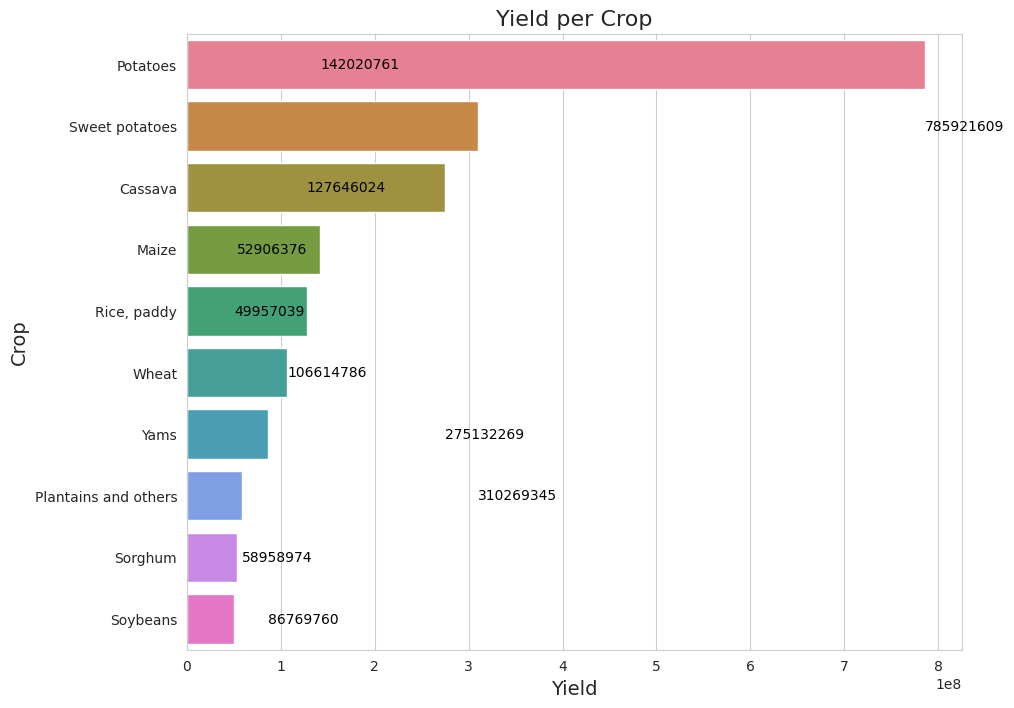

In [ ]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a figure and axis objects with specified size
plt.figure(figsize=(10, 8))

# Plot the bar plot with seaborn
sns.barplot(y=crops, x=yield_per_crop, palette="husl", order=sorted(crops, key=lambda x: yield_per_crop[crops.tolist().index(x)], reverse=True))

# Add title and labels
plt.title("Yield per Crop", fontsize=16)
plt.xlabel("Yield", fontsize=14)
plt.ylabel("Crop", fontsize=14)

# Add annotations with values on the bars
for i, v in enumerate(yield_per_crop):
    plt.text(v, i, str(round(v, 2)), ha='left', va='center', fontsize=10, color='black')

# Show the plot
plt.show()


# Train Test split Rearranging Columns

In [ ]:
col = ['Year', 'average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp', 'Area', 'Item', 'hg/ha_yield']
df = df[col]
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
df.head(3)

Year  average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp     Area  \
0  1990                         1485.0              121.0     16.37  Albania   
1  1990                         1485.0              121.0     16.37  Albania   
2  1990                         1485.0              121.0     16.37  Albania   

          Item  hg/ha_yield  
0        Maize        36613  
1     Potatoes        66667  
2  Rice, paddy        23333

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0, shuffle=True)

# Converting Categorical to Numerical and Scaling the values

In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

# Instantiate the transformers
ohe = OneHotEncoder(drop='first')
scale = StandardScaler()

# Create the ColumnTransformer
preprocessor = make_column_transformer(
    (scale, [0, 1, 2, 3]),  # Standard scale the numerical features
    (ohe, [4, 5]),           # One-hot encode the categorical features
    remainder='passthrough' # Passthrough the remaining features
)


In [ ]:
X_train_dummy = preprocessor.fit_transform(X_train)
X_test_dummy = preprocessor.transform(X_test)


In [ ]:
preprocessor.get_feature_names_out(col[:-1])

array(['standardscaler__Year',
       'standardscaler__average_rain_fall_mm_per_year',
       'standardscaler__pesticides_tonnes', 'standardscaler__avg_temp',
       'onehotencoder__Area_Algeria', 'onehotencoder__Area_Angola',
       'onehotencoder__Area_Argentina', 'onehotencoder__Area_Armenia',
       'onehotencoder__Area_Australia', 'onehotencoder__Area_Austria',
       'onehotencoder__Area_Azerbaijan', 'onehotencoder__Area_Bahamas',
       'onehotencoder__Area_Bahrain', 'onehotencoder__Area_Bangladesh',
       'onehotencoder__Area_Belarus', 'onehotencoder__Area_Belgium',
       'onehotencoder__Area_Botswana', 'onehotencoder__Area_Brazil',
       'onehotencoder__Area_Bulgaria', 'onehotencoder__Area_Burkina Faso',
       'onehotencoder__Area_Burundi', 'onehotencoder__Area_Cameroon',
       'onehotencoder__Area_Canada',
       'onehotencoder__Area_Central African Republic',
       'onehotencoder__Area_Chile', 'onehotencoder__Area_Colombia',
       'onehotencoder__Area_Croatia', 'oneho

# Let's train our model

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Define models in a dictionary
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor()
}

# Define evaluation metrics
evaluation_metrics = {
    'Mean Absolute Error': mean_absolute_error,
    'R^2 Score': r2_score
}

# Split data and fit models
for name, model in models.items():
    model.fit(X_train_dummy, y_train)
    y_pred = model.predict(X_test_dummy)

    # Print model name
    print(f"\n{name}:")

    # Calculate and print evaluation metrics
    for metric_name, metric_func in evaluation_metrics.items():
        score = metric_func(y_test, y_pred)
        print(f"{metric_name}: {score:.4f}")



Linear Regression:
Mean Absolute Error: 29907.4918
R^2 Score: 0.7473

KNN:
Mean Absolute Error: 4620.0373
R^2 Score: 0.9849


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505226
  model = cd_fast.sparse_enet_coordinate_descent(



Lasso:
Mean Absolute Error: 29893.9976
R^2 Score: 0.7473

Ridge:
Mean Absolute Error: 29864.8876
R^2 Score: 0.7473

Decision Tree:
Mean Absolute Error: 3951.0671
R^2 Score: 0.9791


# Select model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the model
dtr = KNeighborsRegressor()

# Train the model
dtr.fit(X_train_dummy, y_train)

# Make predictions
y_pred = dtr.predict(X_test_dummy)

# Print the predictions
print(y_pred)


[ 36704.4  26605.2  21543.2 ...  23360.4  35078.6 157096.8]


# Predictive System

In [ ]:
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    # Create an array of the input features
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype=object)

    # Transform the features using the preprocessor
    transformed_features = preprocessor.transform(features)

    # Make the prediction
    predicted_yield = dtr.predict(transformed_features).reshape(1, -1)

    return predicted_yield[0]

Year = 1990
average_rain_fall_mm_per_year = 1485.0
pesticides_tonnes = 121.00
avg_temp = 16.37
Area = 'Albania'
Item = 'Maize'

# Call the prediction function
result = prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item)

# Print the result
print(result)


[30938.2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [ ]:
result

array([30938.2])

# Pickle Files

In [ ]:
import pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
# prompt: /usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names   warnings.warn( /usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names   warnings.warn( -----------------------------------------------

!pip install pickle5
import pickle5 as pickle
pickle.dump(dtr,open('dtr.pkl','wb'))
pickle.dump(preprocessor,open('preprocessor.pkl','wb'))
print(sklearn.__version__)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.1/132.1 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pickle5: filename=pickle5-0.0.11-cp310-cp310-linux_x86_64.whl size=255319 sha256=a144df1071e3ad99de506f2d37479acdf250dac2c87d7b16b4fdbb8861da475e
  Stored in directory: /root/.cache/pip/wheels/7d/14/ef/4aab19d27fa8e58772be5c71c16add0426acf9e1f64353235c
Successfully built pickle5
1.2.2


In [ ]:
# prompt: perform shap

!pip install shap
import shap

explainer = shap.KernelExplainer(dtr.predict, X_train_dummy)
shap_values = explainer.shap_values(X_test_dummy)

shap.summary_plot(shap_values, X_test_dummy, feature_names=preprocessor.get_feature_names_out(col[:-1]))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 7.3 MB/s eta 0:00:00


  0%|          | 0/5187 [00:00<?, ?it/s]

In [ ]:
# prompt: WARNING:shap:Using 20745 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.

import warnings
warnings.filterwarnings("ignore")
explainer = shap.KernelExplainer(dtr.predict, X_train_dummy)
shap_values = explainer.shap_values(X_test_dummy)

shap.summary_plot(shap_values, X_test_dummy, feature_names=preprocessor.get_feature_names_out(col[:-1]))


NameError: name 'shap' is not defined

In [ ]:
# prompt: Collecting sklearn   Downloading sklearn-0.0.post12.tar.gz (2.6 kB)   error: subprocess-exited-with-error      × python setup.py egg_info did not run successfully.   │ exit code: 1   ╰─> See above for output.      note: This error originates from a subprocess, and is likely not a problem with pip.   Preparing metadata (setup.py) ... error error: metadata-generation-failed  × Encountered error whil

!pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
# prompt: Requirement already satisfied: pip in /usr/local/lib/python3.10/dist-packages (24.0) WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv

!pip install --upgrade --user pip


In [ ]:
# prompt:   warnings.warn( /usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names   warnings.warn( --------------------------------------------------------------------------- ModuleNotFoundError                       Traceback (most recent call last) <ipython-input-47-1b1089c06d9c> in <cell line: 14>()

!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=50f269f5a7fba626a118f76e783d53b4285e9b320ce615fc8dc715f0dd3c9097
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 3.6 MB/s eta 0:00:00
